$\textbf{Structure de bande}$

<module 'matplotlib.pyplot' from '/usr/local/lib64/python3.6/site-packages/matplotlib/pyplot.py'>

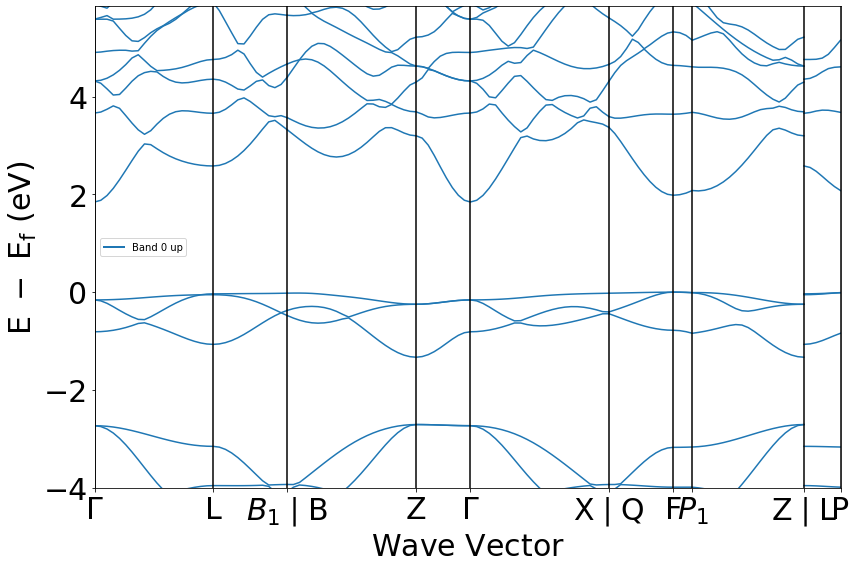

In [1]:
from pymatgen import Lattice, Structure, Molecule
from pymatgen.ext.matproj import MPRester
from pymatgen.symmetry.analyzer import SpacegroupAnalyzer
import numpy as np
import matplotlib.pyplot as plt
from pymatgen.electronic_structure.plotter import BSPlotter
from pymatgen.electronic_structure.boltztrap import *

with MPRester("d4klromGgnasAIpD") as m:

    # Structure for material id
    bandstructure = m.get_bandstructure_by_material_id("mp-23056")
bsplotter = BSPlotter(bandstructure)
bsplotter.get_plot()

$\textbf{Bande interdite}$

In [2]:
print(" La bande interdite est indirecte : 'direct' = {}, \n L'énergie de la bande interdite est {} eV \n La transition se fait au segement {}".format(bandstructure.get_band_gap().get("direct"),bandstructure.get_band_gap().get('energy'), bandstructure.get_band_gap().get('transition')))

 La bande interdite est indirecte : 'direct' = False, 
 L'énergie de la bande interdite est 1.8426 eV 
 La transition se fait au segement F-\Gamma


La bande interdite étant indirecte (c'est à dire que le point le plus haut en énergie de la dernière bande de valence n'est pas directement sous le point le plus bas de la première bande de conduction), les électrons ne peuvent pas passer de la bande de valence à la bande de conduction uniquement en échangeant un photon. En effet, ces derniers sont de quantités de mouvement négligeables et sont donc incapables à eux seuls de modifier le vecteur d'onde de l'électron. L'interaction avec un phonon est alors nécessaire, ce qui rend la transition bien moins probable.
Le gap étant relativement faible (entre 1 et 2 eV), le matériau est un semi-conducteur. Cela veut dire qu'il est isolant à température nulle, mais qu'une fois que celle-ci augmente, les électrons peuvent passer de la bande de valence à la bande de conduction. La conductivité augmente avec la température.

$\textbf{Dispersion des bandes}$

La dispersion d'une bande d'énergie est la variation de l'énergie par rapport au vecteur d'onde k. On dit que la bande disperse peu quand elle ne dépend pas beaucoup de k. A la limite, la bande est presque plate, ce qui équivaut à une masse effective quasi infinie, c'est comme si la particule était extrêmement lourde dû à un potentil très élevé sur l'électron qui a donc une très faible mobilité. Plus la dispersion est élevée, plus la courbure de la bande est grande. Pour trouver la direction dans laquelle la bande disperse le plus/le moins pour la dernière bande de valence (il s'agit de la 15e bande pour le $Sr_2BrN$) et pour la première bande de conduction (la 16e bande), on va donc calculer sur chaque branche de la zone de Brillouin de ces deux bandes la variation de l'énergie par rapport au vecteur d'onde k.

In [6]:
data = bsplotter.bs_plot_data()
energy = data.get('energy')
k = data.get('ticks').get('distance')  #coordonnées des points de la zone de Brillouin, vecteurs d'onde k.
del k[1]  
del k[3]
del k[4]
del k[6]
del k[7]
dist = np.array(k[1:])-np.array(k[:-1])  #longueur des branches de la zone de Brillouin
#On cherche la variation de l'énergie par rapport à k pour chaque branche de la dernière bande de valence (15e)
#et la première bande de conduction (16e)
max_var_v = abs(((energy.get('1')[0][15][-1]) - (energy.get('1')[0][15][0]))/dist[0])
min_var_v = abs(((energy.get('1')[0][15][-1]) - (energy.get('1')[0][15][0]))/dist[0])
max_var_c = abs(((energy.get('1')[0][16][-1]) - (energy.get('1')[0][16][0]))/dist[0])
min_var_c = abs(((energy.get('1')[0][16][-1]) - (energy.get('1')[0][16][0]))/dist[0])
nmaxv = 0
nminv = 0
nmaxc = 0
nminc = 0
for i in range(np.size(dist)):
    var_v = abs(((energy.get('1')[i][15][-1]) - (energy.get('1')[i][15][0]))/dist[i])
    var_c = abs(((energy.get('1')[i][16][-1]) - (energy.get('1')[i][16][0]))/dist[i])
    if (var_v<min_var_v):
        min_var_v = var_v
        nminv=i
    if (var_v>max_var_v):
        max_var_v = var_v
        nmaxv = i
    if (var_c<min_var_c):
        min_var_c=var_c
        nminc = i
    if (var_c>max_var_c):
        max_var_c = var_c
        nmaxc = i
print("La plus grande dispersion pour la dernière bande de valence est {} et a lieu sur la {}eme branche, la branche P1-Z,  représentée en bleu dans la figure ce dessous".format(max_var_v, nmaxv+1))
print('\n')
print("La plus faible dispersion pour la dernière bande de valence est {} et a lieu sur la {}eme branche, la branche L-B1,  représentée en vert dans la figure ce dessous".format(min_var_v, nminv+1))
print('\n')
print("La plus grande dispersion pour la première bande de conduction est {} et a lieu sur la {}eme branche, la branche Z-Gamma,  représentée en rouge dans la figure ce dessous".format(max_var_c, nmaxc+1))
print('\n')
print("La plus faible dispersion pour la première bande de conduction est {} et a lieu sur la {}eme branche, la branche B-Z, représentée en jaune dans la figure ce dessous".format(min_var_c, nminc+1))

La plus grande dispersion pour la dernière bande de valence est 0.2729225318523767 et a lieu sur la 8eme branche, la branche P1-Z,  représentée en bleu dans la figure ce dessous


La plus faible dispersion pour la dernière bande de valence est 0.023806978646701935 et a lieu sur la 2eme branche, la branche L-B1,  représentée en vert dans la figure ce dessous


La plus grande dispersion pour la première bande de conduction est 3.190396713466474 et a lieu sur la 4eme branche, la branche Z-Gamma,  représentée en rouge dans la figure ce dessous


La plus faible dispersion pour la première bande de conduction est 0.12249347652341239 et a lieu sur la 3eme branche, la branche B-Z, représentée en jaune dans la figure ce dessous


$\textbf{Figure de dispersion des bandes}$

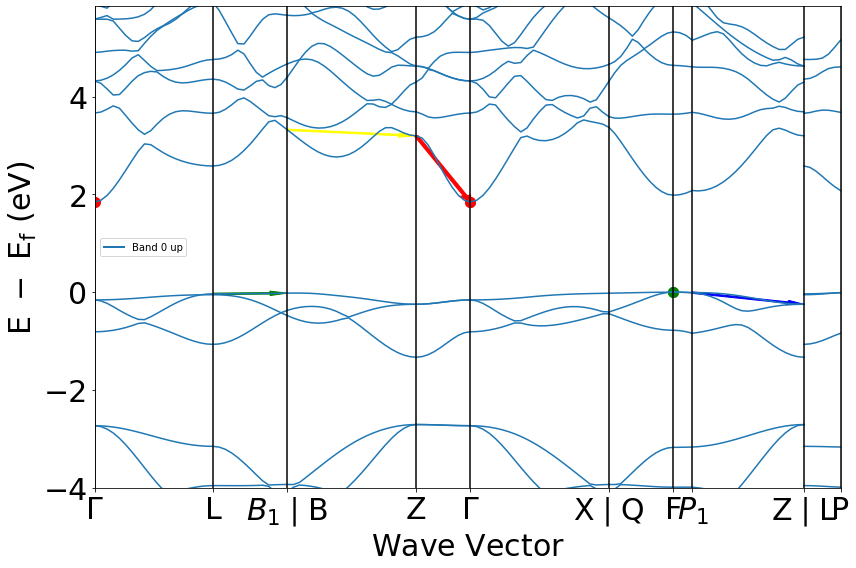

In [4]:
bsplotter.get_plot(vbm_cbm_marker=True)
#Flèche pour la plus grande dispersion de la dernière bande de valence
plt.arrow(k[nmaxv],energy.get('1')[nmaxv][15][0],k[nmaxv+1]-k[nmaxv],energy.get('1')[nmaxv][15][-1]-energy.get('1')[nmaxv][15][0],width = 0.03,length_includes_head=True,color='blue')
#Flèche pour la plus faible dispersion de la dernière bande de valence
plt.arrow(k[nminv],energy.get('1')[nminv][15][0],k[nminv+1]-k[nminv],energy.get('1')[nminv][15][-1]-energy.get('1')[nminv][15][0],width = 0.03,length_includes_head=True,color='green')
#Flèche pour la plus grande dispersion de la première bande de conduction
plt.arrow(k[nmaxc],energy.get('1')[nmaxc][16][0],k[nmaxc+1]-k[nmaxc],energy.get('1')[nmaxc][16][-1]-energy.get('1')[nmaxc][16][0],width = 0.03,length_includes_head=True,color='red')
#Flèche pour la plus faible dispersion de la première bande de conduction
plt.arrow(k[nminc],energy.get('1')[nminc][16][0],k[nminc+1]-k[nminc],energy.get('1')[nminc][16][-1]-energy.get('1')[nminc][16][0],width = 0.03,length_includes_head=True,color='yellow')
plt.show()

On remarque que la dispersion la plus élevée pour la dernière bande de valence (en bleu) n'est pas dans une des directions autour du maximum de cette bande, alors que la dispersion la plus élevée pour la première bande de conduction est bien dans une des directions autour du minimum de cette bande. Ce n'est donc pas parce que le maximum/minimum de la bande se trouve en un certain point que la dispersion est la plus élevée autour de ce point. 

$\textbf{Calcul des masses effectives}$

La masse effective est la masse "ressentie" de la particule, qui est due au potentiel qui lui est appliqué. Ainsi, un électron dans un potentiel fort qui aura une faible mobilité aura une masse effective élevée, et à l'inverse, un électron dans un potentiel faible qui aura une mobilité élevée aura une masse effective faible. Comme dit précédemment, plus la bande d'énergie a une grande dispersion (grande variation de l'énergie en fonction du vetceur d'onde k), plus la masse effective est faible.
On fait l'hypothèse d'une dispersion parabolique. La masse effective peut alors s'exprimer comme: $$m^* = \frac{\hbar^2}{\frac{\partial^2\epsilon}{\partial k^2}}$$ avec $\hbar$ la constante de Planck réduite qui vaut $h$ divisée par $2\pi$

Pour connaitre les masses effectives au sommet de la dernière bande de valence et au bas de la première bande de conduction, il nous faut trouver $\frac{\partial^2\epsilon}{\partial k^2}$ en ces deux points. Pour cela, procédons à une interpolation quadratique autour de ces points. La fonction quadratique obtenue, correspondant à $\epsilon(k)$ "simplifiée" autour des extrema d'intérêt, est de la forme $ak^2 + bk + c$, donc $\frac{\partial^2\epsilon}{\partial k^2} = 2a$. 

$\textbf{Calcul et représentation de la masse effective du sommet de la dernière bande de valence}$

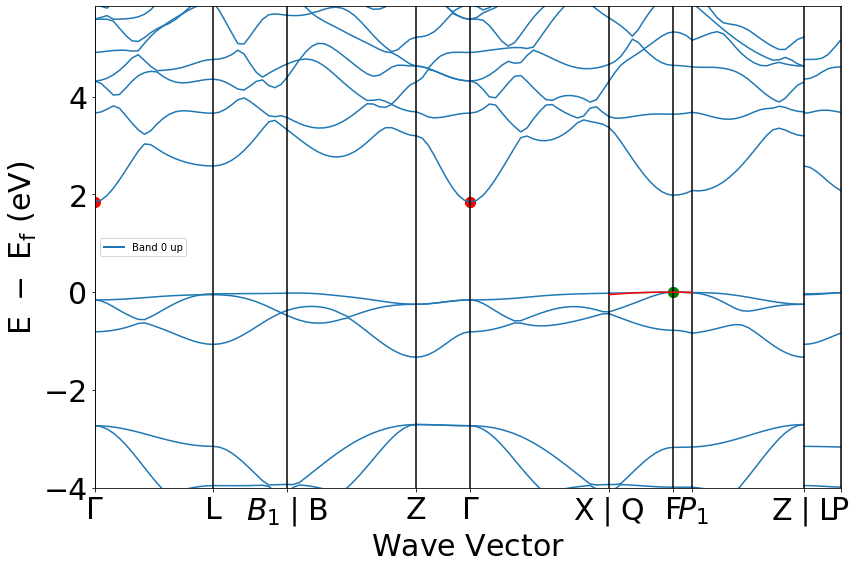

In [26]:
from scipy.interpolate import interp1d

kpoints = data.get('distances')
xv= np.append(kpoints[5][-6:],kpoints[6][:6])
yv = np.append(energy.get('1')[5][15][-6:], energy.get('1')[6][15][:6])
#obtenir les coefficient a,b et c décrivant la fonction quadratique de la forme ax^2+bx+c, interpolation de la dernière bande
# de valance autour de son sommet
coefv = np.polyfit(xv,yv,2)
xvplot = np.append(kpoints[5],kpoints[6])
yvplot = np.append(energy.get('1')[5][15],energy.get('1')[6][15])
#Afficher l'interpolation quadratique
bsplotter.get_plot(vbm_cbm_marker=True)
plt.plot(xvplot,coefv[0]*xvplot**2+coefv[1]*xvplot+coefv[2],color='red')

On remarque que le maximum de la dernière bande de valence est un point dégénéré avec le maximum de l'avant dernière bande de valence (14e) pour laquelle la dispersion autour de ce point est plus élevée, et donc la masse effective plus faible. Cependant, il nous est demandé d'obtenir la masse effective pour le sommet de la dernière bande de valence, on n'en tiendra donc pas compte, même si il est intéressant de prendre conscience de ce cas particulier.

Nous pouvons maintenant calculer la masse effective au sommet de la dernière bande de valance grâce à la derivée seconde en ce point de la fonction quadratique que nous venons de créer. Comme dit plus haut, cette dérivée seconde vaut $2a$, avec $a$ le coefficient du terme au carré de la fonction d'interpolation quadratique, c'est à dire $coefv[0]$ dans le code. Puisque les énergies fournies par les fonctions pythons utilisée sont en eV et les distance en Å, des reconversions sont nécessaires pour obtenir une masse en kg. La masse effective prend son sens en étant comparée à la masse réelle de la particule, ici la masse d'un électron. On va donc exprimer la masse effective par rapport à la masse de l'électron.

In [36]:
import scipy.constants as sc
ddev = 2*coefv[0]
hbar = sc.hbar
A = 10**(-20)
eV = sc.e
me = sc.m_e
m1 = hbar**2/ddev *1/(A*eV)
m2 = m1/me
print("La masse effective au sommet de la dernière bande de valence est m*={}kg,\n ou encore m*={}me (en masse d'électron)".format(m1,m2))

La masse effective au sommet de la dernière bande de valence est m*=-1.4322990880160977e-29kg,
 ou encore m*=-15.723336890290915me (en masse d'électron)


La masse effective est plus grande que la masse de l'électron. En effet, sur la figure, la dispersion est faible autour du maximum de la dernière bande de valence, donc la masse effective élevée. Le signe négatif est du à la courbure négative de la fonction quadratique représentant l'énergie autour du maximum.

$\textbf{Calcul et représentation de la masse effective du bas de la première bande de conduction}$

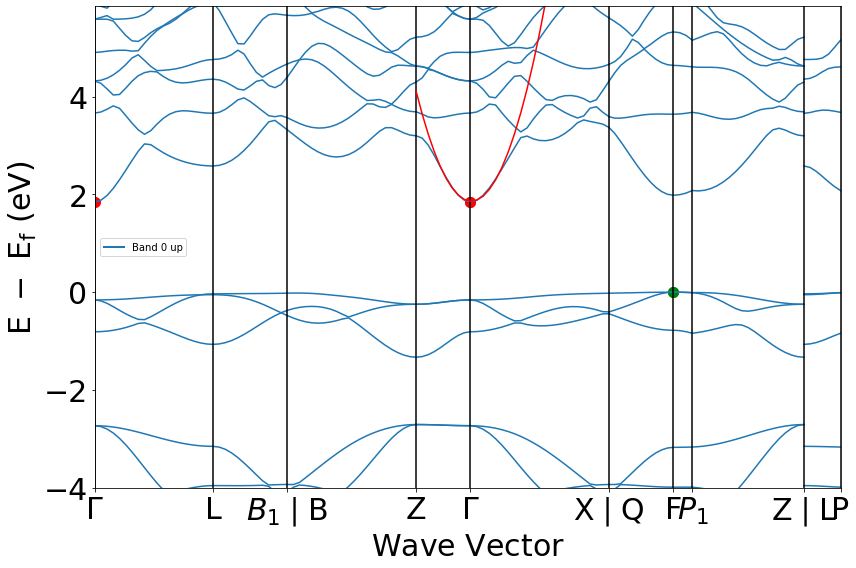

In [35]:
xc= np.append(kpoints[3][-6:],kpoints[4][:6])
yc = np.append(energy.get('1')[3][16][-6:], energy.get('1')[4][16][:6])
#obtenir les coefficient a,b et c décrivant la fonction quadratique de la forme ax^2+bx+c, interpolation de la première bande
# de conduction autour de son minimum
coefc = np.polyfit(xc,yc,2)
xcplot = np.append(kpoints[3],kpoints[4])
ycplot = np.append(energy.get('1')[3][16],energy.get('1')[4][16])
#Afficher l'interpolation quadratique
bsplotter.get_plot(vbm_cbm_marker=True)
plt.plot(xcplot,coefc[0]*xcplot**2+coefc[1]*xcplot+coefc[2],color='red')

Nous avons obtenu, comme pour la dernière bande de valence, l'interpolation quadratique de la première bande de conduction autour de son minimum. La masse effective en ce point se calcul de la même manière:

In [38]:
ddec = 2*coefc[0]
m3 = hbar**2/ddec *1/(A*eV)
m4 = m3/me
print("La masse effective au bas de la première bande de conduction est m*={}kg,\n ou encore m*={}me (en masse d'électron)".format(m3,m4))

La masse effective au bas de la première bande de conduction est m*=2.876548508247191e-31kg,
 ou encore m*=0.3157786083567347me (en masse d'électron)


Comme attendu, on a une masse effective plus faible que la masse réelle de l'électron pour une dispersion plus élevée.